Odczyt z pliku - 0, wpisywanie ręczne - 1:0
[1.0, 2.0, 3.0, 4.0, 5.0] [2.0, -1.0, 3.0, -1.0, 3.0]


Macierz trójdiagonalna: 
 [[4.0, 1.0, 0], [1.0, 4.0, 1.0], [0, 1.0, 4.0]]


Macierz trójdiagonalna odwrócona: 
 [[ 0.26785714 -0.07142857  0.01785714]
 [-0.07142857  0.28571429 -0.07142857]
 [ 0.01785714 -0.07142857  0.26785714]]



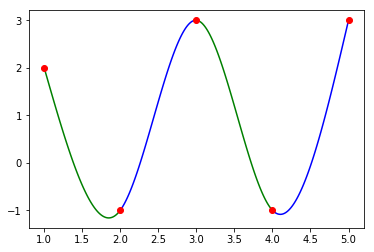

Wielomian 0 :  2.5892857142857144 (x - x 0 )^3 +  0.0 (x - x 0 )^2 +  -5.589285714285714 (x - x 0 ) +  2.0
Wielomian 1 :  -5.946428571428572 (x - x 1 )^3 +  7.767857142857143 (x - x 1 )^2 +  2.178571428571428 (x - x 1 ) +  -1.0
Wielomian 2 :  6.196428571428572 (x - x 2 )^3 +  -10.071428571428571 (x - x 2 )^2 +  -0.125 (x - x 2 ) +  3.0
Wielomian 3 :  -2.839285714285714 (x - x 3 )^3 +  8.517857142857142 (x - x 3 )^2 +  -1.678571428571428 (x - x 3 ) +  -1.0


In [48]:
# 0. Import bibliotek
import numpy as np
from array import *
import pylab
import matplotlib.pyplot as plt
from decimal import getcontext, Decimal

# 1. Wprowadzenie punktów:

tabX = []
tabY = []
mode=-1
while(mode!=0 and mode!=1):
    mode = int(input("Odczyt z pliku - 0, wpisywanie ręczne - 1:"))
    
if(mode==1):
    n = int(input("Ilość punktów:"))
    for i in range (n):
        addX = float(input("x:"))
        tabX.append(addX)
        addY = float(input("y:"))
        tabY.append(addY)
else:
    with open('tekst.txt') as myfile:
        data=myfile.read()
    wiadomość=data
    wiadomość = re.sub(r"\s+", "", wiadomość, flags=re.UNICODE)
    i=0
    while(i<len(wiadomość)-1):
        if(wiadomość[i]=="-"):
            tabX.append(-float(wiadomość[i+1]))
            i=i+1
        else:
            tabX.append(float(wiadomość[i]))
        
        if(wiadomość[i+1]=="-"):
            tabY.append(-float(wiadomość[i+2]))
            i=i+1
        else:
            tabY.append(float(wiadomość[i+1]))
        i=i+2
    print(tabX,tabY)

    n=len(tabX)
    
print("")

# 2. Macierz trójdiagonalna:

# 2.1 Zdefiniowana
T = [[0.0] * (n-2) for i in range(n-2)]


for i in range (0,n-2):
    arr = [0] * (n-2)

        
    # 2.2 Diagonala
    arr[i] = 4.0
    
    # 2.3 Nad diagonalą
    if (i > n-4):
        pass
    else:
        arr[i+1] = 1.0
    
    # 2.4 Pod diagonalą
    if (i < 1):
        pass
    else:
        arr[i-1] = 1.0
    
    T[i] = arr
    
print("\nMacierz trójdiagonalna: \n",T)

# 3. Odwrócenie macierzy trójdiagonalnej:
print("\n")
T2 = np.linalg.inv(T)
print("Macierz trójdiagonalna odwrócona: \n",T2)

print("")


# 4. Stworzenie macierzy Y i wypełnienie wartościami
Y = [0.0] * (n-2)

for i in range (0, n-2):
    h = tabX[i+1] - tabX[i]
    Y[i] = int(tabY[i] - 2*tabY[i+1] + tabY[i+2]) * (6.0 / (h**2))


# 5. Przygotowanie 2 macierzy "Y2" i lewostronne mnożenie macierzy T2 i Y:
Y2 = [0.0] * (n-2)
mult = 0.0
for i in range (0, n-2):
    mult = 0.0
    for j in range (0, n-2):
        mult += Y[j] * T2[i][j]    
    Y2[i] = mult



# 6. Stworzenie macierzy M:
M = [0.0] * n
for i in range (1,n-1):
    M[i] = Y2[i-1]


#7. Współczynniki A,B,C,D dla kolejnych wielomianów:
A = [0.0] * (n-1)
B = [0.0] * (n-1)
C = [0.0] * (n-1)
D = [0.0] * (n-1)
for i in range (0, n-1):
    A[i] = (M[i+1] - M[i]) / (6.0 * (tabX[i+1] - tabX[i]))
    B[i] = M[i] / 2.0
    C[i] = ((tabY[i+1] - tabY[i]) / (tabX[i+1] - tabX[i])) - (((M[i+1] + (2 * M[i])) / 6.0) * (tabX[i+1] - tabX[i]))
    D[i] = tabY[i]
    

# 8. Zdefiniowanie przedziału na osi X dla wielomianu i:
rr=[]
for x in range(0,len(tabX)-1):
    rr.append(np.arange(tabX[x], tabX[x+1], 0.01))

# 9. Funkcja tworząca wielomian:
def y(o,a):
    i = a
    return (A[i] * ((o - tabX[i])**3)) + (B[i] * ((o - tabX[i])**2)) + (C[i] * (o - tabX[i])) + D[i]

# 10. Naniesienie wielomianów na wykres:
for x in range(0,len(tabX)-1):
    if(x%2==0):
        plt.plot(rr[x], y(rr[x],x),'g-')
    else:
        plt.plot(rr[x], y(rr[x],x),'b-')

# 11. Naniesienie węzłów interpolacyjnych na wykres: 
for x in range(0,len(tabX)):
    plt.plot([tabX[x]],[tabY[x]],'ro')

# 12. Wyswietlenie wykresu:
plt.show()


# 13. Wypisanie wielomianów:
for x in range(0,len(tabX)-1):
    print("Wielomian",x,": ",A[x],"(x - x",x,")^3 + ",B[x],"(x - x",x,")^2 + ",C[x],"(x - x",x,") + ",D[x])  